# Mississauga Coding
### Jupyter Notebook/Pandas

# Jupyter Notebook

Jupyter Notebook is a browser based IDE that is optimized for the data analysis/science workflow.
It uses a cell/output system instead of running whole python scripts in the shell.

It is very useful for exploratory analysis, where you want to type a few lines of code, and see a result.  Type a few more, result.

#### Regular Python Code

In [1]:
2+2

4

In [2]:
for x in range(0, 10):
    print("Mississauga Coding")

Mississauga Coding
Mississauga Coding
Mississauga Coding
Mississauga Coding
Mississauga Coding
Mississauga Coding
Mississauga Coding
Mississauga Coding
Mississauga Coding
Mississauga Coding


#### Where can I play with Jupyter?

http://jupyter.org/try

You can choose either Jupyter with Python or JupyterLab. <br>
Jupyter is the legacy interface that has been around for a few years.  JupyterLab is the newly built interface that was just released a few months ago.  I prefer JupyterLab.

#### How do I install Jupyter on my own machine?

For new users, it is highly recommended that you use the Anaconda Python distribution.<br>
Anaconda conveniently installs Python, the Jupyter Notebook, and other commonly used packages for scientific computing and data science.<br>
https://www.anaconda.com/download/


For more experienced Python developers, Jupyter can be installed through pip.






# Pandas

In [3]:
import pandas as pd

# Used for charting later on
import seaborn as sns
import matplotlib.pyplot as plt

#### What is Pandas?
Pandas is a python library to enable data analysis

#### Pandas Data Structures (Series/Dataframe)

DataFrame -- relational data table, with rows and named columns.<br>
Series -- a single column

The data frame is a commonly used abstraction for data manipulation. Similar implementations exist in Spark and R.

#### Build a series

In [4]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])
display(city_names)
display(population)

0    San Francisco
1         San Jose
2       Sacramento
dtype: object

0     852469
1    1015785
2     485199
dtype: int64

#### Build a dataframe

In [5]:
dfCities = pd.DataFrame({ 'City name': city_names, 'Population': population })
display(dfCities)

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


#### Read data into a dataframe

In [6]:
df = pd.read_csv('./data/college-majors.csv', sep=",")

# Pulling from web isntead
#df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/all-ages.csv", sep=",")


#df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
#df = pd.read_csv("http://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv", sep=",")


#### Display dataframe

In [7]:
df

# Using head function would only show first 5 rows
#df.head()

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0
5,1105,PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources,79409,63043,51077,2070,0.031791,50000,35000,75000.0
6,1106,SOIL SCIENCE,Agriculture & Natural Resources,6586,4926,4042,264,0.050867,63000,39400,88000.0
7,1199,MISCELLANEOUS AGRICULTURE,Agriculture & Natural Resources,8549,6392,5074,261,0.039230,52000,35000,75000.0
8,1301,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,65238,4736,0.051290,52000,38000,75000.0
9,1302,FORESTRY,Agriculture & Natural Resources,69447,48228,39613,2144,0.042563,58000,40500,80000.0


#### A few quick series operations

In [8]:
print("Total Graduates:", df['Total'].sum())
print("Unemployed:", df['Unemployed'].sum())
print("Unemployed Percentage:", df['Unemployed'].sum()/df['Total'].sum())

Total Graduates: 39834398
Unemployed: 1682431
Unemployed Percentage: 0.042235632630873446


### Analysis

#### What is the unemployment percentage by Major_category?

In [9]:
unemp_by_major_cat = df.groupby(['Major_category'])['Total', 'Unemployed'].sum()
unemp_by_major_cat['unemp percentage'] = unemp_by_major_cat['Unemployed']/unemp_by_major_cat['Total']
unemp_by_major_cat.sort_values(by=['unemp percentage'], ascending=False)

,Total,Unemployed,unemp percentage
Major_category,,,
Interdisciplinary,45199,2990,0.066152
Arts,1805865,104125,0.057659
Communications & Journalism,1803822,101199,0.056103
Psychology & Social Work,1987278,104206,0.052437
Social Science,2654125,132150,0.049790
Humanities & Liberal Arts,3738335,179136,0.047919
Law & Public Policy,902926,43049,0.047677
Computers & Mathematics,1781378,79974,0.044894
Business,9858741,434397,0.044062


#### Deep dive into Social Sciences Major_category

In [10]:
unemp_by_major = df[df.Major_category == 'Social Science'].groupby(['Major_category', 'Major'])['Total', 'Unemployed'].sum()
unemp_by_major['unemp percentage'] = unemp_by_major['Unemployed']/unemp_by_major['Total']
unemp_by_major.sort_values(by=['unemp percentage'], ascending=False)

Total  Unemployed  \
Major_category Major                                                   
Social Science INTERNATIONAL RELATIONS             77371        4278   
               CRIMINOLOGY                         75085        4106   
               POLITICAL SCIENCE AND GOVERNMENT   748956       40376   
               GEOGRAPHY                          115423        6202   
               INTERDISCIPLINARY SOCIAL SCIENCES   61871        3030   
               GENERAL SOCIAL SCIENCES            127363        6132   
               SOCIOLOGY                          674558       32344   
               ECONOMICS                          757616       34974   
               MISCELLANEOUS SOCIAL SCIENCES       15882         708   

                                                  unemp percentage  
Major_category Major                                                
Social Science INTERNATIONAL RELATIONS                    0.055292  
               CRIMINOLOGY                                0.054685  
               POLITICAL SCIENCE AND GOVERNMENT           0.053910  
               GEOGRAPHY                                  0.053733  
               INTERDISCIPLINARY SOCIAL SCIENCES          0.048973  
               GENERAL SOCIAL SCIENCES                    0.048146  
               SOCIOLOGY                                  0.047948  
               ECONOMICS                                  0.046163  
               MISCELLANEOUS SOCIAL SCIENCES              0.044579

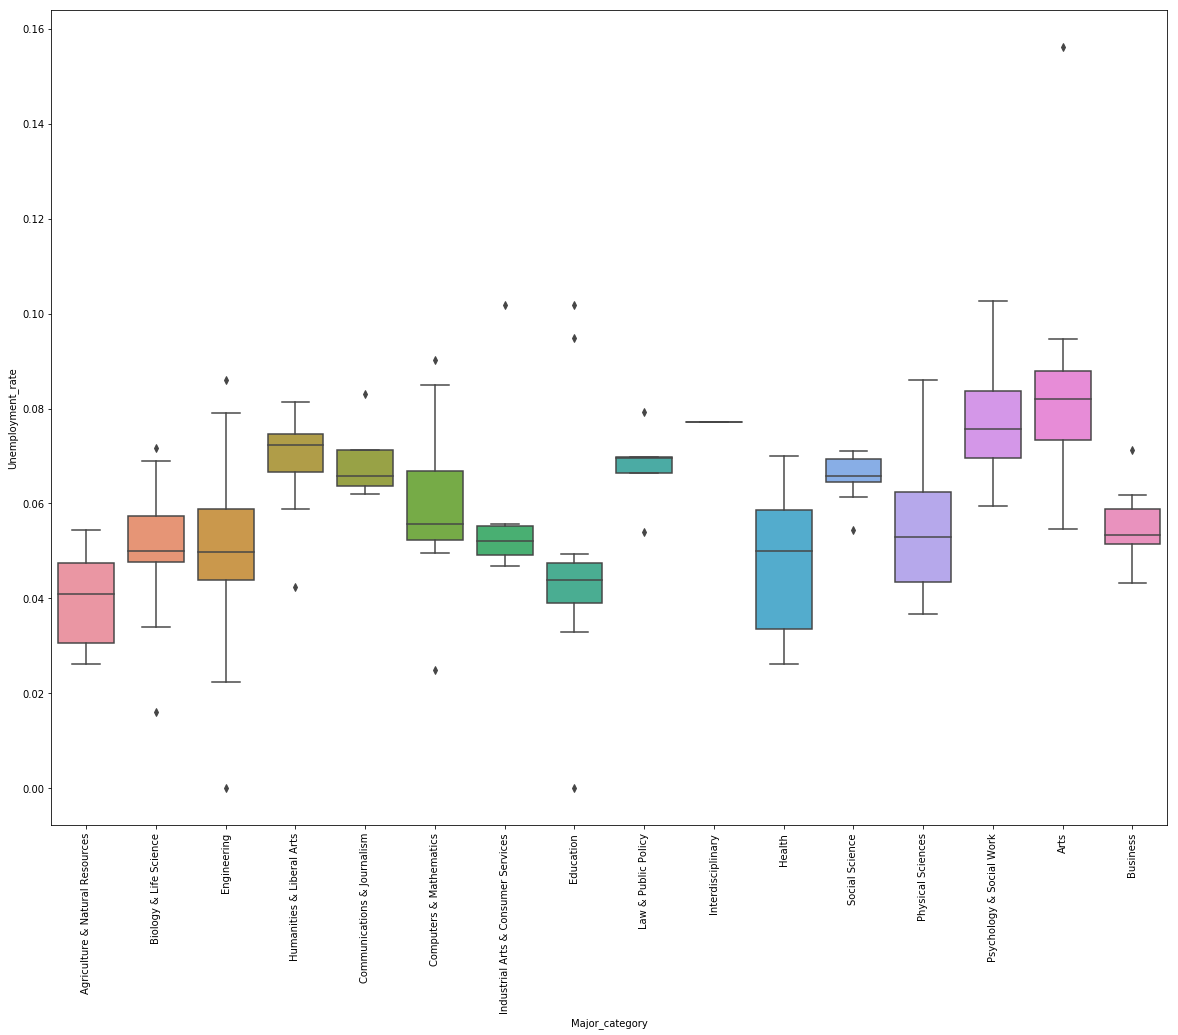

In [12]:


plt.subplots(figsize=(20,15))
ax = sns.boxplot(x='Major_category', y='Unemployment_rate', data=df)
xaxis = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)



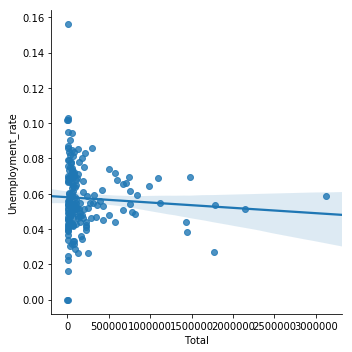

In [14]:
sns.lmplot(x='Total', y='Unemployment_rate',data=df)
#,  fit_reg=False,scatter_kws={"s": z*1000}

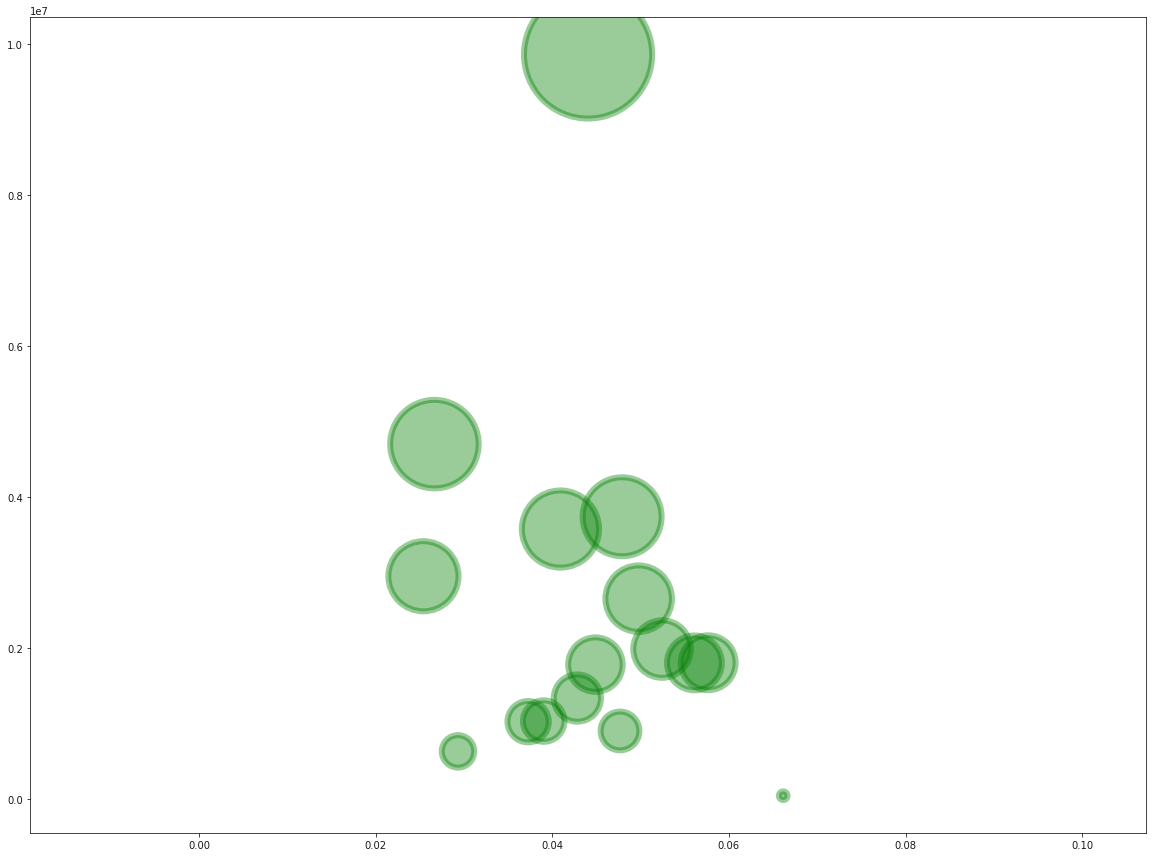

In [57]:
plt.subplots(figsize=(20,15))
plt.scatter(x='unemp percentage', y='Total', s=unemp_by_major_cat['Total']/600, data=unemp_by_major_cat, c="green", alpha=0.4, linewidth=6)

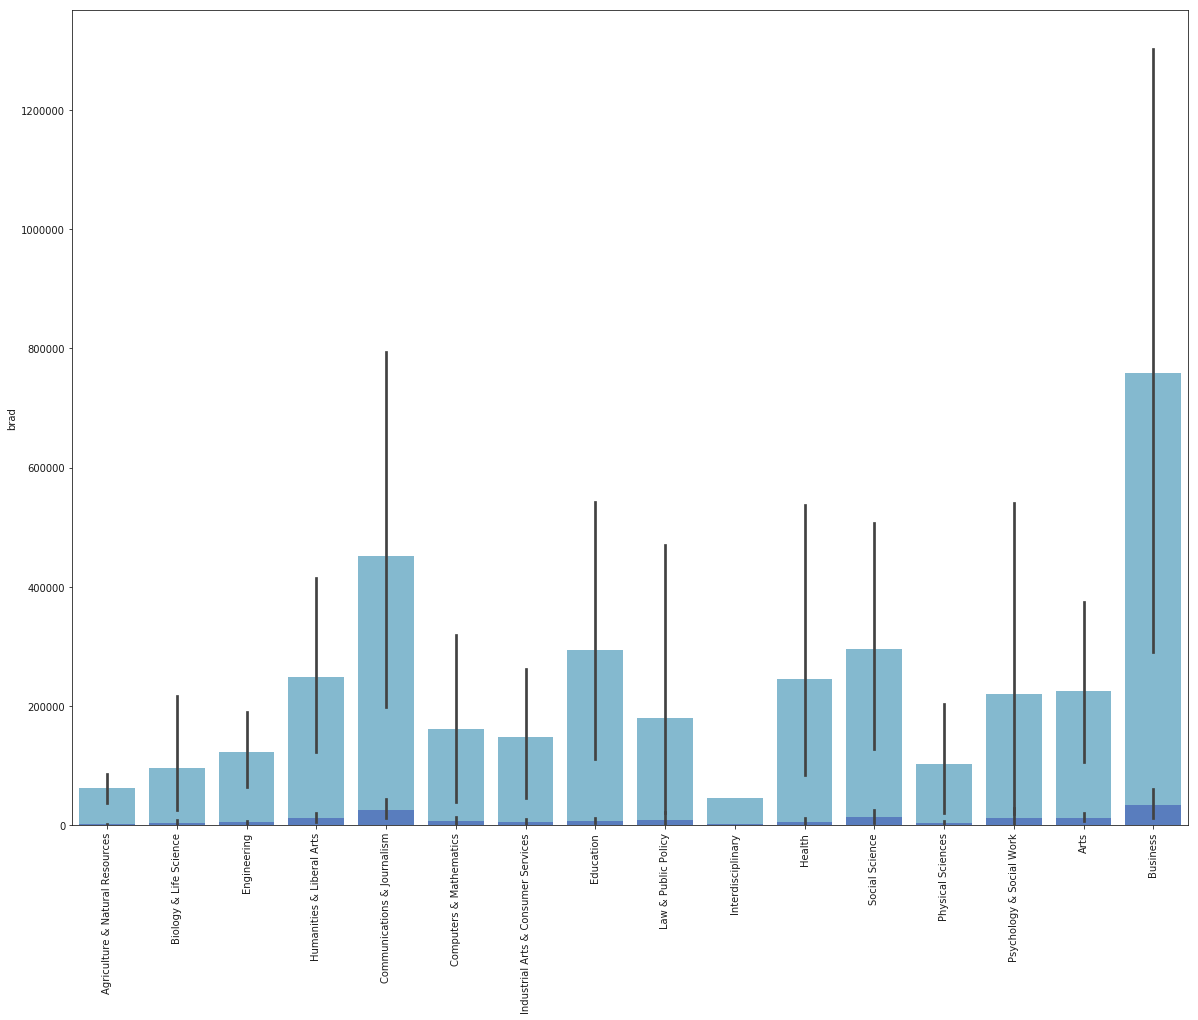

In [58]:
#ns.set(style="whitegrid")

# Initialize the matplotlib figure
#f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes

f, ax = plt.subplots(figsize=(20,15))


# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Major_category", y="Total", data=df,
            label="Alcohol-involved", color="c")

sns.barplot(x="Major_category", y="Unemployed", data=df,
            label="Total", color="b")

# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="brad",
       xlabel="")
xaxis = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#sns.despine(left=True, bottom=True)